# <b>

<p>
<center>
<font size="5">
Machine Learning I (DATS 6202 - O10), Spring 2019
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project 
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Team 9
</font>
</center>
</p>

</b>

# 1.Title

Prediction of house price and classification of house price tag

# 2. Introduction (including the problem and motivation)

Dataset : House Sales in King County, USA

Data Source : www.kaggle.com

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.It's a great dataset for evaluating simple regression models.
The house prices depend on various factors and such factors varies across different markets. In this analysis, we use the King County, USA data set to build a regression model that will help predict the house prices in that region given a set of attributes. I will try to identify a set of attributes and use a mixture of regression techniques to predict the house price.


We are also interested in the labeling of prices, so we use a classification model to classify price tags. House price prediction is another motivation. Then we use multiple linear regression methods and try to predict the house prices by using them. The classfication is composed of five models which are LogisticRegression, GaussianNB, RandomForest, KNN and DecisionTree.

# 3.Experiment(including the coding and the discussion of empirical results)


In [150]:
#Using linear regression to predict the house pricing.At the same time, the price is divided into cheap, general, and expensive. The price tag is classified by machine learning.

In [6]:

##load the data and package
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import seaborn as sns
from scipy.stats import pearsonr

data = pd.read_csv('kc_house_data.csv')

In [7]:
#overview the data to check if there are outlier 
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#check the missing value
data.isnull().sum()
#if there are some missing value 
# df = df.dropna(how='any')

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

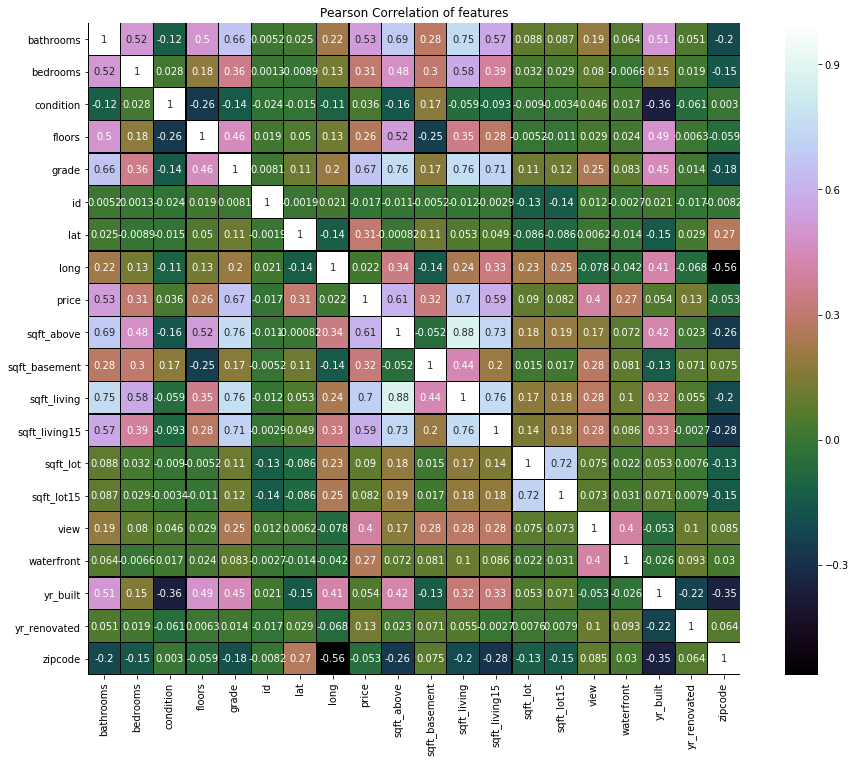

In [5]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = data[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [10]:
#calculate the correlation value between the feature and the target and do the feature selection for model
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
    data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


In [21]:
from sklearn import linear_model


regr = linear_model.LinearRegression()
new_data = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','bedrooms']]


In [22]:
X = new_data.values
y = data.price.values




In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [24]:
regr.fit(X_train, y_train)
print(regr.predict(X_test))

[430010.98907642 773575.21945222 251060.24718323 ... 440497.31975102
 348281.65650676 713701.42636502]


In [17]:
regr.score(X_test, y_test)

0.6345444496927367

In [18]:
# Calculate the Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 226501.31


In [162]:
df=pd.read_csv('kc_house_data.csv',nrows=1000)


In [163]:
#encoding the price and divide it into three lable cheap, general, expensive
df['price_level']=pd.cut((df['price'].values),3, labels=[" cheap", "general", "expensive"])

In [164]:
target = 'price_level'
feature='sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','bedrooms'


In [165]:
#drop the column that is meaningless

X = df.drop(columns=[target,'price','id','date','long','zipcode','yr_renovated','sqft_lot'])
y = df[target]

In [166]:
#check the categorical variable
for j in range(X.shape[1]):
    print(X.columns[j] + ':')
    print(X.iloc[:, j].value_counts(), end='\n\n')

bedrooms:
3    492
4    305
2    114
5     69
6     11
1      7
7      1
0      1
Name: bedrooms, dtype: int64

bathrooms:
2.50    238
1.00    187
1.75    159
2.25    104
2.00     99
1.50     61
2.75     51
3.00     33
3.50     28
3.25     18
0.75      6
4.00      4
4.25      4
4.50      2
5.00      2
0.00      1
4.75      1
3.75      1
1.25      1
Name: bathrooms, dtype: int64

sqft_living:
1510    11
1250    11
1300    10
1330    10
1490    10
1670     9
1400     9
1430     9
2020     9
2160     9
1320     8
1920     8
1900     8
1810     8
1260     8
1010     8
1660     8
1610     8
1000     7
2060     7
2070     7
1220     7
2380     7
2390     7
1760     7
1410     7
1190     7
2100     7
1970     7
2180     7
        ..
3930     1
3370     1
930      1
870      1
4390     1
5403     1
3350     1
4370     1
2310     1
2930     1
1390     1
830      1
3900     1
380      1
4570     1
3545     1
2519     1
1805     1
4550     1
2840     1
1460     1
4890     1
430      1
3500     1


In [167]:
import pandas as pd


X = pd.get_dummies(X, columns=X.columns)
X.head()

,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bathrooms_0.0,bathrooms_0.75,...,sqft_lot15_174240,sqft_lot15_178160,sqft_lot15_181319,sqft_lot15_193842,sqft_lot15_199504,sqft_lot15_210394,sqft_lot15_211267,sqft_lot15_213444,sqft_lot15_218222,sqft_lot15_233971
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
y.value_counts()

 cheap       946
general       44
expensive     10
Name: price_level, dtype: int64

In [169]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y = le.fit_transform(y)

pd.DataFrame(data=y, columns=[target])[target].value_counts()

0    946
2     44
1     10
Name: price_level, dtype: int64

In [170]:
from imblearn.over_sampling import RandomOverSampler

# RandomOverSampler (with random_state=0)

ros = RandomOverSampler(random_state=0)
X, y = ros.fit_sample(X, y)

pd.DataFrame(data=y, columns=[target])[target].value_counts()

1    946
2    946
0    946
Name: price_level, dtype: int64

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB()}

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
    

In [173]:
param_grids = {}

In [174]:
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]


param_grids['lr'] = param_grid

In [175]:
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]


param_grids['dt'] = param_grid

In [176]:
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]


param_grids['rf'] = param_grid

In [177]:
param_grid = [{'clf__n_neighbors': list(range(1, 11))}]


param_grids['knn'] = param_grid

In [178]:
param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]


param_grids['gnb'] = param_grid

In [179]:
import warnings
warnings.filterwarnings('ignore')

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=5,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline

    gs = gs.fit(X, y)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

In [182]:
# Sort best_score_param_estimators in descending order of the best_score_

best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.9996476391825229, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.9968287526427061, {'clf__var_smoothing': 1e-10}, <class 'sklearn.naive_bayes.GaussianNB'>]

[0.9936575052854123, {'clf__C': 0.1, 'clf__multi_class': 'multinomial', 'clf__solver': 'sag'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.9809725158562368, {'clf__min_samples_leaf': 10, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.686046511627907, {'clf__n_neighbors': 1}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]



# 4.Conclusion

Through the linear model, we predict the price, and the accuracy of prediction is 66%.

Through the classification of price tags, the model selection and hyper parameter tuning, we use LogisticRegression, GaussianNB, RandomForest, KNN, DecisionTree to classify the price tags. The results show that the RandomForest classification results are the best, achieving an accuracy of 99%, KNN The classification results were the worst, achieving an accuracy of 68%.